# **EDA-6**

In [33]:
import pandas as pd
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
import matplotlib.pyplot as plt

#### 导入reviews数据

In [35]:
all_reviews = pd.read_csv('/content/drive/My Drive/data/data/2020-01/reviews.csv')

In [36]:
all_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,49091,8243238,2013-10-21,8557223,Jared,Fran was absolutely gracious and welcoming. Ma...
1,50646,11909864,2014-04-18,1356099,James,A comfortable room in a smart condo developmen...
2,50646,13823948,2014-06-05,15222393,Welli,Stayed over at Sujatha's house for 3 good nigh...
3,50646,15117222,2014-07-02,5543172,Cyril,It's been a lovely stay at Sujatha's. The room...
4,50646,15426462,2014-07-08,817532,Jake,"We had a great experience. A nice place, an am..."


#### 将date转为datetime数据后，分离成年月日

In [37]:
all_reviews['date'] = pd.to_datetime(all_reviews['date'])

In [38]:
all_reviews['year'] = all_reviews['date'].dt.year
all_reviews['month'] = all_reviews['date'].dt.month
all_reviews['day'] = all_reviews['date'].dt.day

In [39]:
all_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month,day
0,49091,8243238,2013-10-21,8557223,Jared,Fran was absolutely gracious and welcoming. Ma...,2013,10,21
1,50646,11909864,2014-04-18,1356099,James,A comfortable room in a smart condo developmen...,2014,4,18
2,50646,13823948,2014-06-05,15222393,Welli,Stayed over at Sujatha's house for 3 good nigh...,2014,6,5
3,50646,15117222,2014-07-02,5543172,Cyril,It's been a lovely stay at Sujatha's. The room...,2014,7,2
4,50646,15426462,2014-07-08,817532,Jake,"We had a great experience. A nice place, an am...",2014,7,8


#### 分析每月评论总数量

In [40]:
all_reviews.month.value_counts().sort_index()

1     10289
2      6682
3      7055
4      7513
5      7622
6      8057
7     10311
8     10696
9     10237
10     9785
11     9339
12    10685
Name: month, dtype: int64

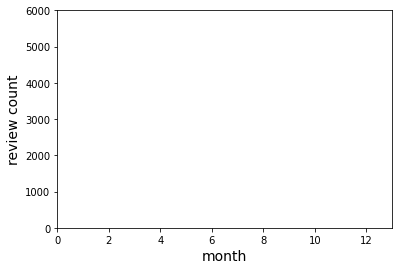

In [41]:
plt.plot(all_reviews.month.value_counts().sort_index())
plt.xlim(0,13)
plt.ylim(0,6000)
plt.xlabel('month', fontsize=14)
plt.ylabel('review count', fontsize=14)
plt.show()

#### 分析2011-2020年每个月评论的数量

In [42]:
all_reviews["year_month"] = pd.to_datetime(all_reviews["year"].astype(str)+"-"+all_reviews["month"].astype(str)).dt.to_period('M')

In [43]:
all_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,year,month,day,year_month
0,49091,8243238,2013-10-21,8557223,Jared,Fran was absolutely gracious and welcoming. Ma...,2013,10,21,2013-10
1,50646,11909864,2014-04-18,1356099,James,A comfortable room in a smart condo developmen...,2014,4,18,2014-04
2,50646,13823948,2014-06-05,15222393,Welli,Stayed over at Sujatha's house for 3 good nigh...,2014,6,5,2014-06
3,50646,15117222,2014-07-02,5543172,Cyril,It's been a lovely stay at Sujatha's. The room...,2014,7,2,2014-07
4,50646,15426462,2014-07-08,817532,Jake,"We had a great experience. A nice place, an am...",2014,7,8,2014-07


In [44]:
all_reviews.year_month.value_counts().sort_index()

2011-05       2
2011-06       2
2011-07       3
2011-08       4
2011-09       4
           ... 
2019-09    4217
2019-10    3936
2019-11    3969
2019-12    4326
2020-01    2797
Freq: M, Name: year_month, Length: 105, dtype: int64

In [45]:
reviews = all_reviews.year_month.value_counts().sort_index().tolist()

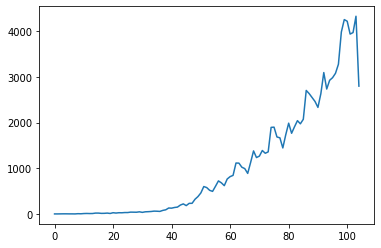

In [46]:
plt.plot(reviews)

<BarContainer object of 105 artists>

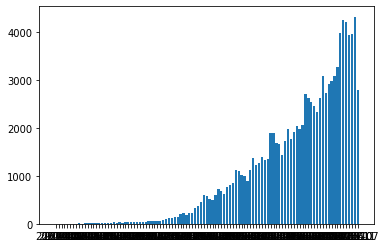

In [47]:
col = pd.unique(all_reviews.year_month.astype(str))
plt.bar(col,reviews)

<BarContainer object of 10 artists>

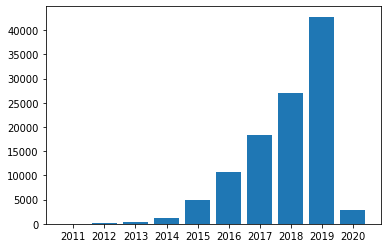

In [57]:
years = pd.unique(all_reviews.year.astype(str))
years.sort()
plt.bar(years,all_reviews.year.value_counts().sort_index())

In [49]:
def counter(df, date):
  # df = pd.read_csv(path)
  yr = int(date[:4])
  mon = int(date[-2:])
  # print(year*100+month)
  df['date'] = pd.to_datetime(df['date'])
  df['year'] = df['date'].dt.year
  df['month'] = df['date'].dt.month
  df['day'] = df['date'].dt.day
  target = df[(df['year']==yr) & (df['month']==mon)]
  return target.shape[0]

In [50]:
dates = ['2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
         '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-10', '2020-11', '2020-12']

In [51]:
reviews = []
path = '/content/drive/My Drive/data/data/'

In [52]:
for date in dates:
  review = pd.read_csv(path+date+'/reviews.csv')
  reviews.append(counter(review,date))
print(reviews)

[1399, 1521, 2263, 2480, 1996, 3206, 2682, 2385, 2514, 2861, 2797, 2124, 901, 493, 512, 330, 314, 337, 521]


<BarContainer object of 19 artists>

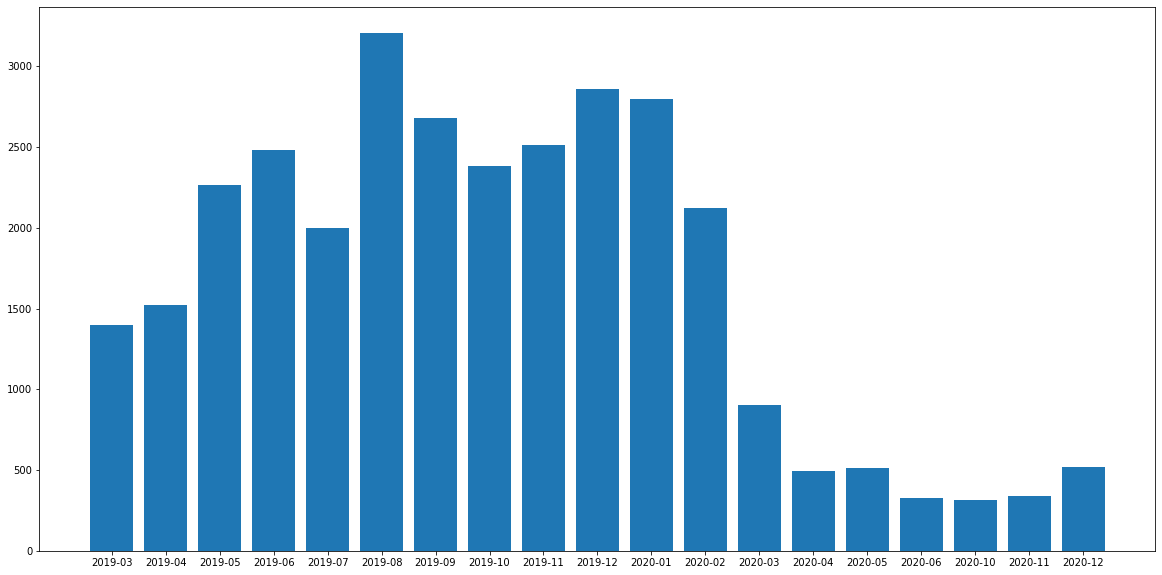

In [53]:
plt.figure(figsize=(20,10))
plt.bar(dates, reviews)